In [1]:
'''
Utilities
'''

SEED = 42
TEST_SIZE = 0.2
VAL_SIZE = 0.2
N_SPLITS = 5
Z_SCORE_THRESHOLD = 3

NN_EPOCHS=100
NN_BATCH_SIZE=64
LR_MAX_ITERATIONS=1000

In [2]:
import pandas as pd

stellar_df = pd.read_csv('star_classification.csv')
stellar_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
stellar_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [4]:
'''
The analysis will use all useful properties for prediction, and will therefore
filter out everything except the five filters (u, g, r, i, z) and redshift.
'''

desired_features = ["u", "g", "r", "i", "z", "redshift"]
stellar_df = stellar_df[desired_features + ["class"]]
stellar_df.describe()

,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [5]:
'''
The description above shows that some values have outliers that need to be removed
'''

import numpy as np
from scipy.stats import zscore

z_scores = stellar_df[desired_features].apply(zscore)
stellar_df = stellar_df[(np.abs(z_scores) < Z_SCORE_THRESHOLD).all(axis=1)]
stellar_df.describe()

,u,g,r,i,z,redshift
count,97884.000000,97884.000000,97884.000000,97884.000000,97884.000000,97884.000000
mean,22.070669,20.630771,19.635406,19.064858,18.747840,0.521902
std,2.241660,2.028210,1.837339,1.730766,1.740999,0.595133
min,14.311050,14.213840,14.082350,13.820090,13.147440,-0.009971
25%,20.332260,18.937160,18.099403,17.698158,17.429533,0.051145
50%,22.157060,21.092840,20.105885,19.378710,18.978690,0.409411
75%,23.670822,22.132375,21.032782,20.360395,19.887835,0.677902
max,29.325650,31.602240,25.151600,24.357300,29.383740,2.768771


In [6]:
'''
This section will give each of the filter names a longer name to make
them easier to interpret visually
'''
new_names = {
    "u": "ultraviolet",
    "g": "green",
    "r": "red",
    "i": "near_infrared",
    "z": "infrared",
}
stellar_df = stellar_df.rename(columns=new_names)
stellar_df

,ultraviolet,green,red,near_infrared,infrared,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


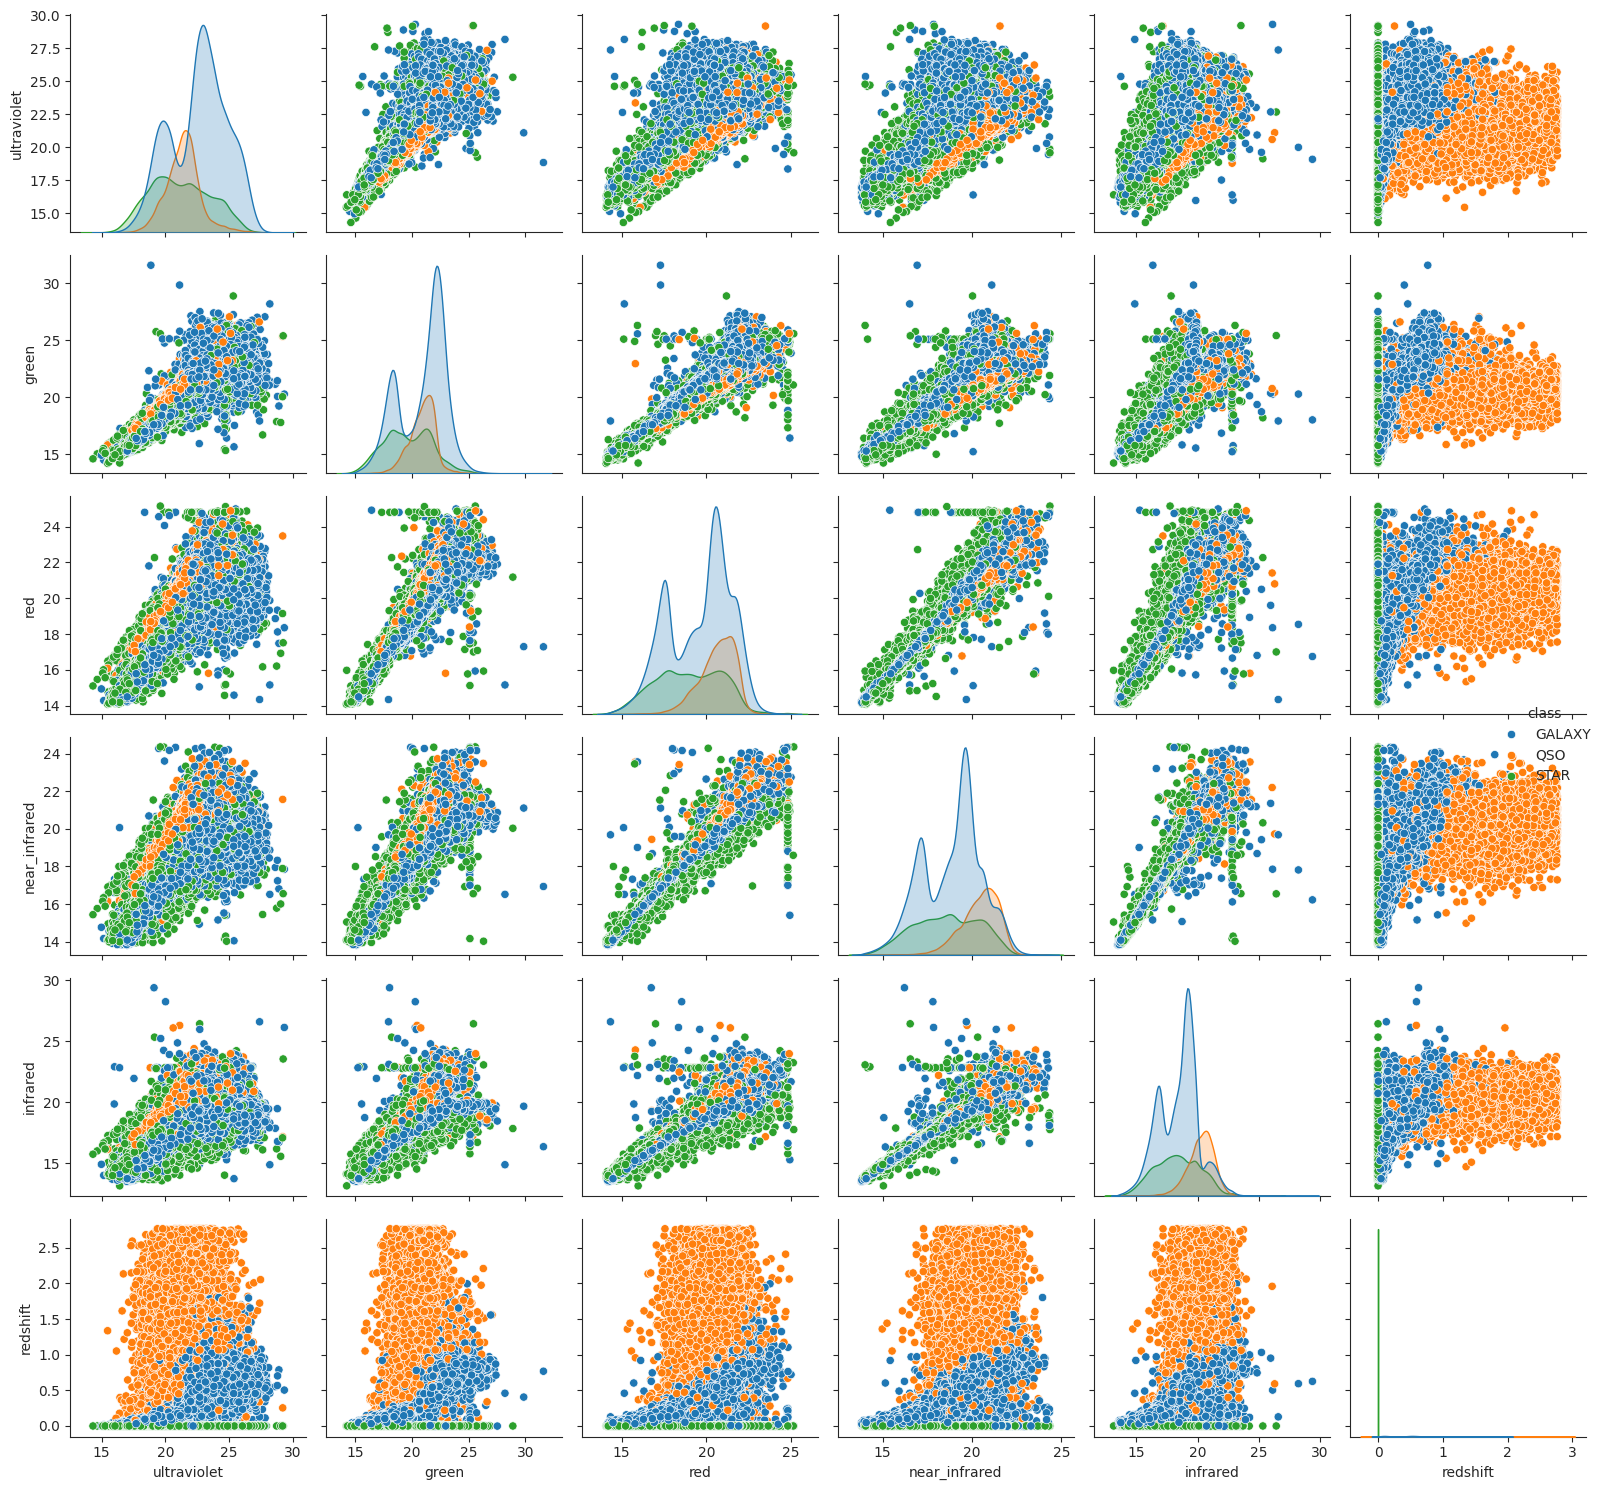

In [7]:
'''
Pairplot visualization before delving into the models themselves.
'''

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
pairplot = sns.pairplot(stellar_df, hue="class", diag_kind="kde")
plt.tight_layout()
plt.show()

In [8]:
'''
Preprocessing
'''

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from dataclasses import dataclass

CLASS_LABELS = {}

def get_full_data():
    X = stellar_df[['ultraviolet', 'green', 'red', 'near_infrared', 'infrared', 'redshift']].copy()
    y = stellar_df["class"].copy()

    le = LabelEncoder()
    y_labeled = le.fit_transform(y)

    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y_labeled, test_size=TEST_SIZE, random_state=SEED, stratify=y_labeled)

    CLASS_LABELS = le.classes_
    print(CLASS_LABELS)

    X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=VAL_SIZE, random_state=SEED, stratify=y_trn)

    scaler = StandardScaler()
    scaler.fit(X_trn)
    X_trn_scaled = scaler.transform(X_trn)
    X_val_scaled = scaler.transform(X_val)
    X_tst_scaled = scaler.transform(X_tst)

    return (X_trn_scaled, y_trn), (X_val_scaled, y_val), (X_tst_scaled, y_tst)


In [9]:
'''
Isolated retrieval step to not need to rerun it often.
'''

(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = get_full_data()

['GALAXY' 'QSO' 'STAR']


In [14]:
'''
Neural Network
-> Training Step

This section is commented out to make running this notebook faster.
'''

import os
from tensorflow.random import set_seed
from tensorflow import get_logger

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

get_logger().setLevel('ERROR')

# np.random.seed(SEED)
# set_seed(SEED)

# from tensorflow.keras.activations import relu, softmax, tanh
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import Dense, Input
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import SparseCategoricalCrossentropy


# model = Sequential([
#     Input(shape=(6,)),
#     Dense(16, activation=relu),
#     Dense(8, activation=relu),
#     Dense(3, activation=softmax)
# ])

# model.compile(optimizer=Adam(),
#               loss=SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# history = model.fit(X_trn, y_trn,
#                     epochs=NN_EPOCHS,
#                     batch_size=NN_BATCH_SIZE,
#                     validation_data=(X_val, y_val),
#                     callbacks=[early_stopping],
#                     verbose=0)

# test_loss, test_accuracy = model.evaluate(X_tst, y_tst, verbose=1)

# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.xticks([])
# plt.title('Learning Curve')
# plt.show()

# model.save_weights("nn.weights.h5")

246/612 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step

2025-05-06 23:31:39.069321: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step
Test Accuracy: 97.24166113296215%


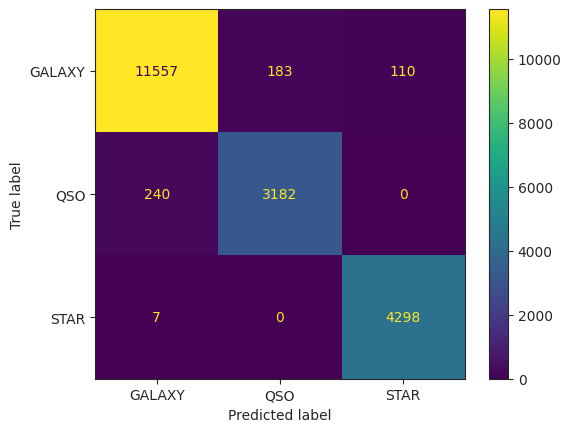

In [15]:
'''
Model A: Neural Network

This section uses weights produced from the more expensive training step in the cell above.
It also nominally uses author-selected hyperparameters due to the time demands of doing
a hyperparameter search for the architecture.
'''

import os
from tensorflow.random import set_seed

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
np.random.seed(SEED)
set_seed(SEED)

from tensorflow.keras.activations import relu, softmax, tanh
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


model = Sequential([
    Input(shape=(6,)),
    Dense(16, activation=relu),
    Dense(8, activation=relu),
    Dense(3, activation=softmax)
])

model.load_weights("nn.weights.h5")

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_hat = np.argmax(model.predict(X_tst), axis=1)
ConfusionMatrixDisplay.from_predictions(y_tst, y_hat,
    display_labels=['GALAXY', 'QSO', 'STAR']
)

print(f'Test Accuracy: {accuracy_score(y_hat, y_tst) * 100}%')

In [12]:
'''
Model B: Logistic Regression
Training Step

This section is commented out to make running this notebook faster.
'''

# import warnings

# from sklearn.exceptions import ConvergenceWarning
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# warnings.filterwarnings("ignore", category=ConvergenceWarning)

# alt_model = LogisticRegression(max_iter=LR_MAX_ITERATIONS)

# '''
# Basic hyperparameter search setup feasible
# due to quick fitting times.
# '''
# C_values = np.logspace(-4, 4, num=9)
# grid = [
#     {
#         'C': C_values,
#         'solver':  ['lbfgs'],
#         'penalty': ['l2'],
#     },
#     {
#         'C': C_values,
#         'solver':  ['newton-cg'],
#         'penalty': ['l2'],
#     },
#     {
#         'C': C_values,
#         'solver':  ['sag'],
#         'penalty': ['l2'],
#     },
#     {
#         'C': C_values,
#         'solver':  ['saga'],
#         'penalty': ['l1', 'l2'],
#     },
# ]

# grid_search = GridSearchCV(
#     estimator=alt_model,
#     param_grid=grid,
#     cv=N_SPLITS,
#     scoring='accuracy',
#     verbose=0
# )

# grid_search.fit(X_trn, y_trn)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(best_params)
# print(best_score)

'\nModel: Logistic Regression\n-> Training\n\nThis section is commented out to make running this notebook faster.\n'

Test Accuracy: 96.30689073913265%


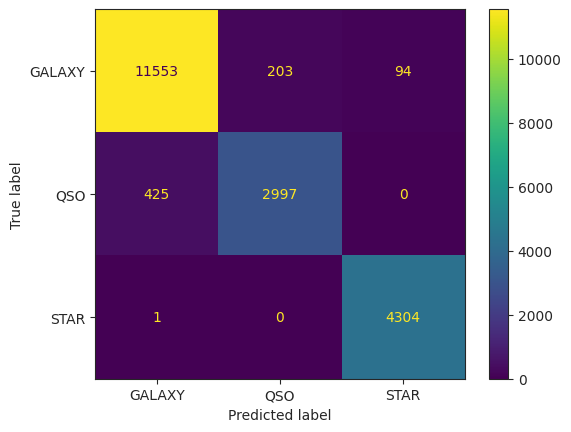

In [13]:
'''
Logistic Regression: Statistics Using Hyperparameters from Prior Section
'''

from sklearn.linear_model import LogisticRegression

alt_model = LogisticRegression(C=10_000, penalty='l2', solver='lbfgs')
alt_model.fit(X_trn, y_trn)
y_hat = alt_model.predict(X_tst)
ConfusionMatrixDisplay.from_predictions(y_tst, y_hat,
    display_labels=['GALAXY', 'QSO', 'STAR']
)

print(f'Test Accuracy: {accuracy_score(y_hat, y_tst) * 100}%')